## <font color=Green>GMD Figure 8 </font>  
#### <font color=blue> *Extreme sea-level return-period curves at New York City under SSP1-2.6 and SSP5-8.5, under Workflows 1f, 2f, 3f and 4, in the historical period (black) and the years 2050 (blue) and 2100 (red).* </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
import tarfile
from datetime import date
import os
#
import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
#
colrs = 'rcbgmyrkcbgm'

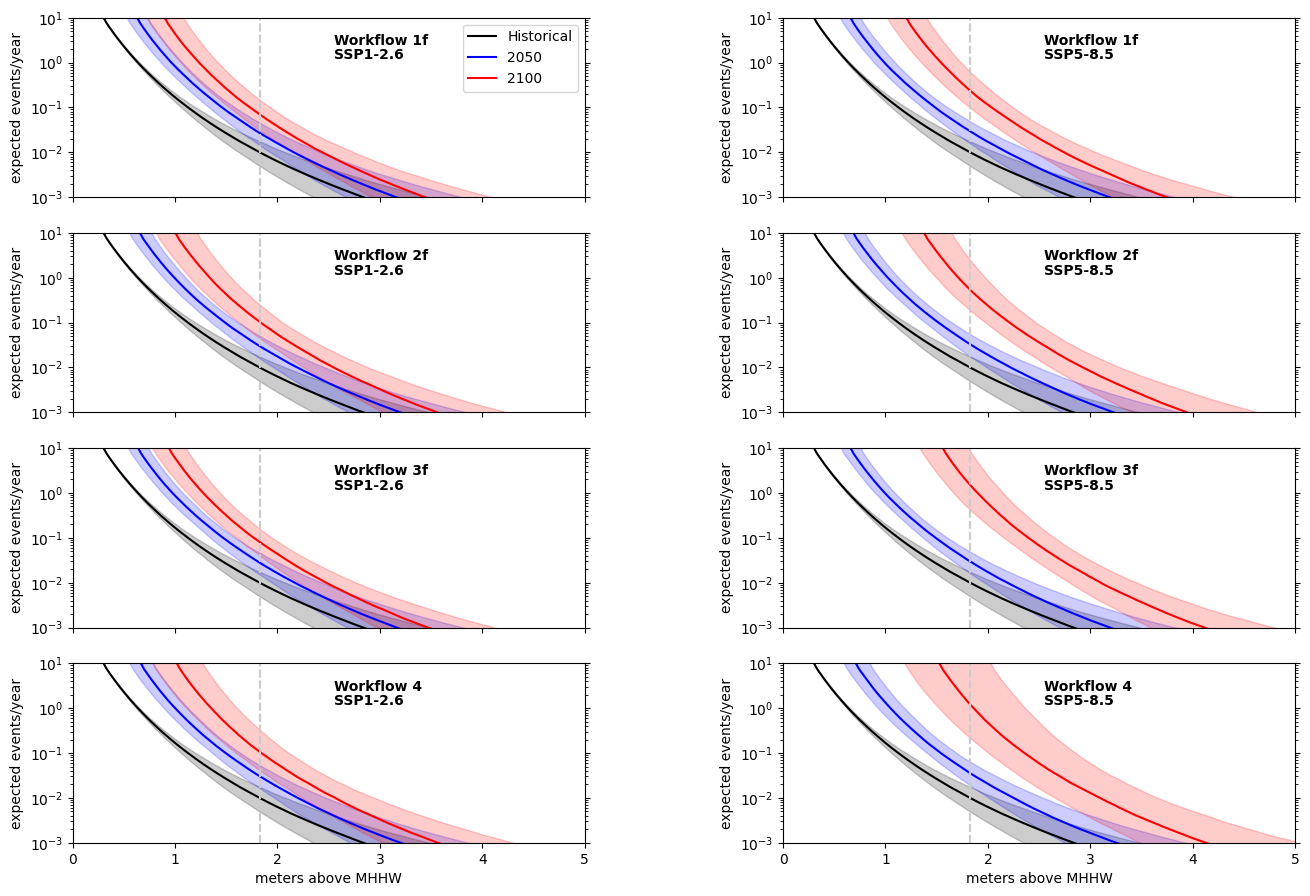

In [2]:
EXPDATE  = 230116
SCENARIO = ['ssp126','ssp585']
WORKFLO  = ["wf1f","wf2f","wf3f","wf4"]
PTILE    = [0.50, 0.17, 0.83]
#
#
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(45,30), 'figure.dpi':100})
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid00 = grid[0].subgridspec(4, 5)
grid01 = grid[1].subgridspec(4, 5)
#
# Subplot Axis.
ax1_wf1f = plt.subplot(grid00[0, :4]);   ax2_wf1f = plt.subplot(grid01[0, :4]);
ax1_wf2f = plt.subplot(grid00[1, :4]);   ax2_wf2f = plt.subplot(grid01[1, :4]);
ax1_wf3f = plt.subplot(grid00[2, :4]);   ax2_wf3f = plt.subplot(grid01[2, :4]);
ax1_wf4  = plt.subplot(grid00[3, :4]);   ax2_wf4  = plt.subplot(grid01[3, :4]);
#
#
# Get the tar data, unpack & PLOT
for scenario in SCENARIO:
    for wf in WORKFLO:
        dataFOLDER  = '/projects/kopp/facts-experiments/{arg2}/esl.{arg1}/output/'.format(arg1=scenario,arg2=EXPDATE)
        tarFILE = 'esl.{arg1}.extremesealevel.extremesealevel.pointsoverthreshold.{arg2}_extremesl.tgz'.format(arg1=scenario,arg2=wf)
        file = tarfile.open(dataFOLDER+tarFILE)
        #
        # Extract Data
        file.extractall('./ESL_nc_data')
        file.close()
        #
        # Select subplot axis (based on workflow)
        if scenario == 'ssp126': 
            ax1 = eval(f'ax1_{wf}');  
        elif scenario == 'ssp585':
            ax1 = eval(f'ax2_{wf}');
        #
        # Each zip folder has 2 files.
        year = ['2050','2100']
        for yy in year:
            d_nc = xr.open_dataset('ESL_nc_data/' + 'esl.{arg1}.extremesealevel.extremesealevel.pointsoverthreshold.{arg2}_id12_year{arg3}_extremesl.nc'.format(arg1=scenario,arg2=wf,arg3=yy))
            #
            a_height                  = d_nc.coords['heights'].values - d_nc.mhhw.values
            a_projected_frequencies   = d_nc.projected_frequencies.values
            a_historical_frequencies  = d_nc.historical_frequencies.values
            a_quantiles               = np.around( d_nc.coords['quantiles'].values , 2)
            #
            # Find index of percentiles.
            p_MEDIAN, p_LOWER, p_UPPER = [np.where(a_quantiles == ptile)[0][0] for ptile in PTILE]
            #
            #
            if yy == '2050': 
                ax1.plot(a_height,a_historical_frequencies[p_MEDIAN,:], '-k',label = 'Historical')
                ax1.fill_between(a_height, a_historical_frequencies[p_LOWER,:], a_historical_frequencies[p_UPPER,:],color='black', alpha=0.2)
                #
                ax1.plot(a_height,a_projected_frequencies[p_MEDIAN,:], '-b',label = '2050')
                ax1.fill_between(a_height, a_projected_frequencies[p_LOWER,:], a_projected_frequencies[p_UPPER,:],color='blue', alpha=0.2)
                #
            if yy == '2100': 
                # ax1.plot(a_height,a_historical_frequencies[p_MEDIAN,:], '--k',label = 'Historical')
                ax1.plot(a_height,a_projected_frequencies[p_MEDIAN,:], '-r',label = '2100')
                ax1.fill_between(a_height, a_projected_frequencies[p_LOWER,:], a_projected_frequencies[p_UPPER,:],color='red', alpha=0.2)
                #
            # Grey Line
            # Extract the x-values and y-values from the data
            x = a_height; y = a_historical_frequencies[p_MEDIAN,:]
            # Set a tolerance for the y-values (e.g., 0.1)
            tolerance = 0.01
            # Find the x-values corresponding to y-values that are within the tolerance
            x_intercepts = x[np.abs(y) < tolerance]
            # x_intercepts[0]
            ax1.axvline(x=x_intercepts[0],color=(0.8, 0.8, 0.8),linestyle='--')
            #
        ax1.set_yscale("log")
        ax1.tick_params(axis='both', labelsize=10)
        ax1.yaxis.set_ticks_position('both')
        #
        ax1.set_ylim([1e-3, 10]) ; ax1.set_xlim([0,5]); 
        #
        ax1.set_xlabel("meters above MHHW");
        ax1.set_ylabel("expected events/year");
        #
        ax1.text(.51, .91, 'Workflow '+wf[2:], horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax1.transAxes)
        ax1.text(.51, .83, scenario[:3].upper()+scenario[3]+'-'+scenario[4]+'.'+scenario[5], horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax1.transAxes)
        if wf != 'wf4': ax1.xaxis.set_ticklabels([]); ax1.set_xlabel('')
        if wf == 'wf1f' and scenario == 'ssp126': ax1.legend(loc='upper right',prop={'size': 10});
        # plt.title('NEW YORK') 
#
# Get todays date.
today = date.today().strftime('%Y-%m-%d')
# Save Figure.
figureNAME = "Fig8_ESL"+today+".pdf"
if os.path.exists(figureNAME): os.remove(figureNAME)
# plt.savefig(figureNAME, format="pdf", bbox_inches="tight")
# 
plt.show()        